<a href="https://colab.research.google.com/github/RvM9622/DeepLearning/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('Indians_Stroke_Predictions.csv')
df.head()

,ID,Age,Gender,Hypertension,Heart Disease,Ever Married,Work Type,Residence Type,Average Glucose Level,BMI,...,Dietary Habits,Alcohol Consumption,Chronic Stress,Sleep Hours,Family History of Stroke,Education Level,Income Level,Stroke Risk Score,Region,Stroke Occurrence
0,1,78.0,Female,0.0,0.0,NaN,Private,Rural,267.30,36.2,...,Non-Vegetarian,0.0,0.0,11,0.0,Tertiary,NaN,88.0,South,0
1,2,60.0,Female,0.0,0.0,0.0,Private,Rural,207.24,19.8,...,Vegetarian,0.0,0.0,9,0.0,Secondary,High,56.0,East,0
2,3,69.0,Male,0.0,0.0,0.0,Private,Urban,161.30,34.5,...,Mixed,1.0,0.0,3,0.0,Secondary,High,NaN,NaN,1
3,4,43.0,Male,0.0,0.0,1.0,Never Worked,Urban,247.49,48.8,...,NaN,0.0,NaN,4,0.0,Tertiary,NaN,93.0,South,0
4,5,30.0,Female,0.0,0.0,1.0,Government,Urban,NaN,31.3,...,Mixed,0.0,1.0,9,0.0,Secondary,NaN,99.0,West,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172000 entries, 0 to 171999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        172000 non-null  int64  
 1   Age                       155559 non-null  float64
 2   Gender                    155741 non-null  object 
 3   Hypertension              155373 non-null  float64
 4   Heart Disease             155699 non-null  float64
 5   Ever Married              155640 non-null  float64
 6   Work Type                 155644 non-null  object 
 7   Residence Type            155481 non-null  object 
 8   Average Glucose Level     155698 non-null  float64
 9   BMI                       172000 non-null  float64
 10  Smoking Status            155405 non-null  object 
 11  Physical Activity         155769 non-null  object 
 12  Dietary Habits            155596 non-null  object 
 13  Alcohol Consumption       155830 non-null  f

In [5]:
df.isna().sum()

,0
ID,0
Age,16441
Gender,16259
Hypertension,16627
Heart Disease,16301
Ever Married,16360
Work Type,16356
Residence Type,16519
Average Glucose Level,16302
BMI,0


In [6]:
for column in df.columns:
  if pd.api.types.is_object_dtype(df[column]):
    df[column] = df[column].fillna(df[column].mode()[0])
  elif pd.api.types.is_numeric_dtype(df[column]):
    df[column] = df[column].fillna(df[column].mean())

df.head()

,ID,Age,Gender,Hypertension,Heart Disease,Ever Married,Work Type,Residence Type,Average Glucose Level,BMI,...,Dietary Habits,Alcohol Consumption,Chronic Stress,Sleep Hours,Family History of Stroke,Education Level,Income Level,Stroke Risk Score,Region,Stroke Occurrence
0,1,78.0,Female,0.0,0.0,0.301022,Private,Rural,267.300000,36.2,...,Non-Vegetarian,0.0,0.000000,11,0.0,Tertiary,Low,88.000000,South,0
1,2,60.0,Female,0.0,0.0,0.000000,Private,Rural,207.240000,19.8,...,Vegetarian,0.0,0.000000,9,0.0,Secondary,High,56.000000,East,0
2,3,69.0,Male,0.0,0.0,0.000000,Private,Urban,161.300000,34.5,...,Mixed,1.0,0.000000,3,0.0,Secondary,High,50.604806,North,1
3,4,43.0,Male,0.0,0.0,1.000000,Never Worked,Urban,247.490000,48.8,...,Non-Vegetarian,0.0,0.250045,4,0.0,Tertiary,Low,93.000000,South,0
4,5,30.0,Female,0.0,0.0,1.000000,Government,Urban,184.902157,31.3,...,Mixed,0.0,1.000000,9,0.0,Secondary,Low,99.000000,West,0


In [7]:
df.isna().sum().sum()

0

# Data Visualisation

1. Stroke Occurrence by Age Distribution

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-9-01a9835b4984>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Stroke Occurrence', y='Age', palette='coolwarm')


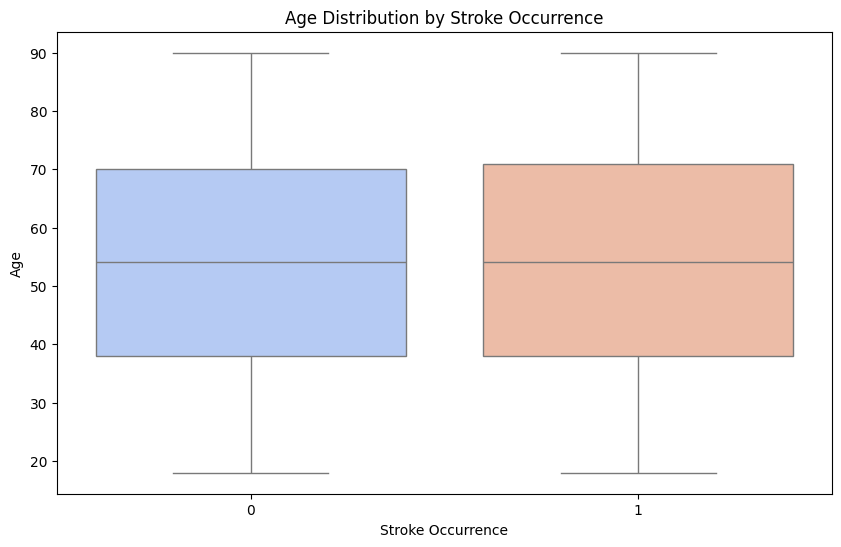

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Stroke Occurrence', y='Age', palette='coolwarm')
plt.title('Age Distribution by Stroke Occurrence')
plt.xlabel('Stroke Occurrence')
plt.ylabel('Age')
plt.show()

2. Stroke Occurrence vs. Smoking Status

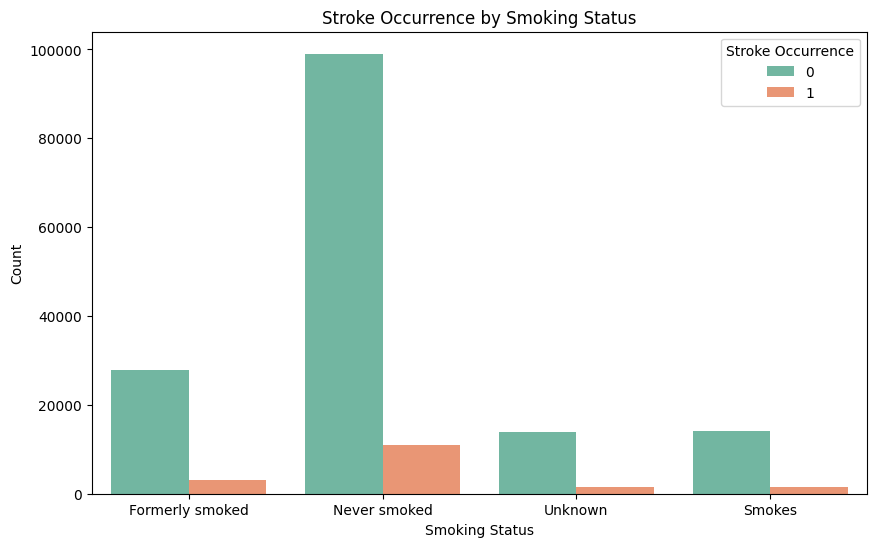

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Smoking Status', hue='Stroke Occurrence', palette='Set2')
plt.title('Stroke Occurrence by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend(title='Stroke Occurrence')
plt.show()

3. Correlation Heatmap for Continuous Features

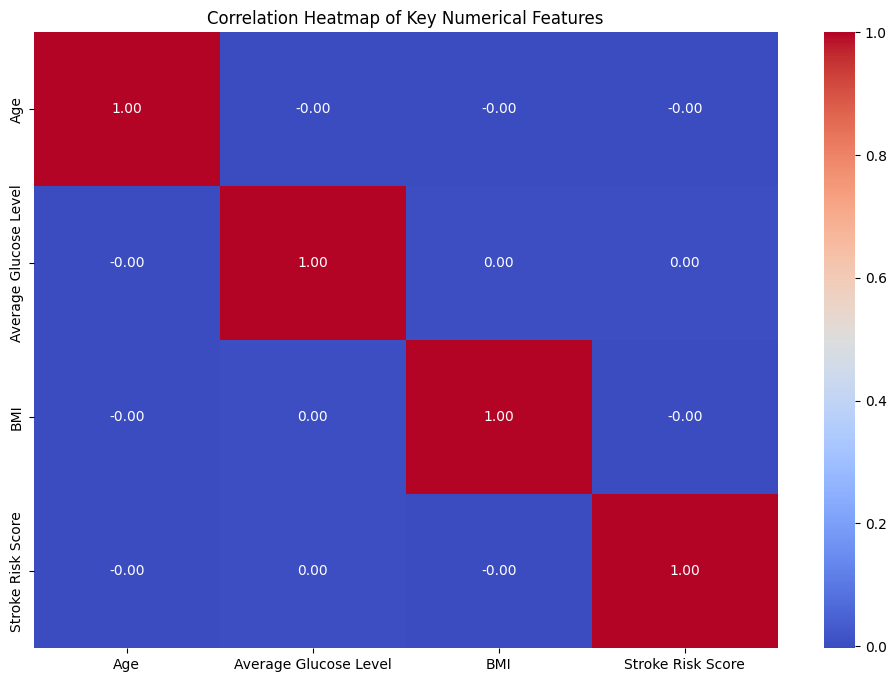

In [11]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[['Age', 'Average Glucose Level', 'BMI', 'Stroke Risk Score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Key Numerical Features')
plt.show()

4. Stroke Risk by Physical Activity and Dietary Habits

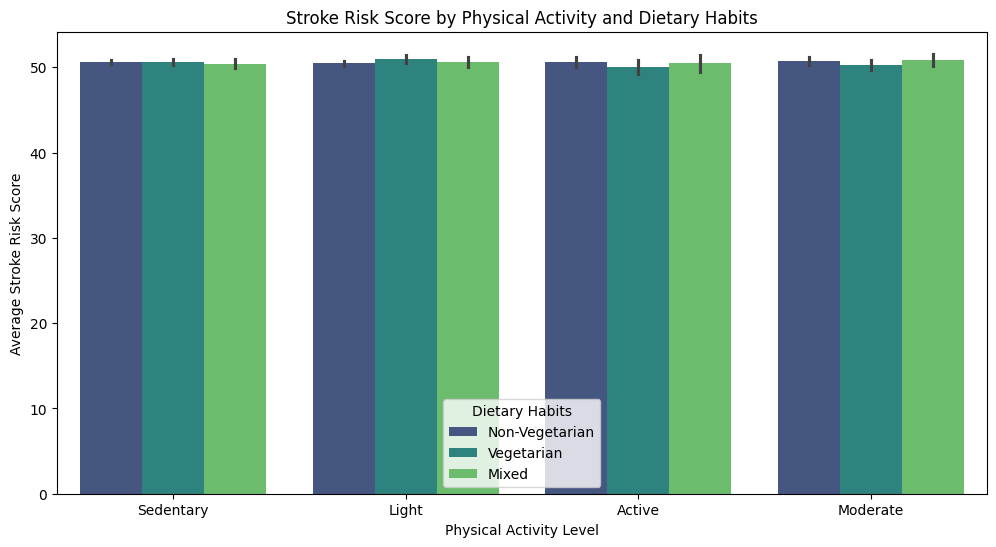

In [12]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Physical Activity', y='Stroke Risk Score', hue='Dietary Habits', palette='viridis')
plt.title('Stroke Risk Score by Physical Activity and Dietary Habits')
plt.xlabel('Physical Activity Level')
plt.ylabel('Average Stroke Risk Score')
plt.legend(title='Dietary Habits')
plt.show()

5. Stroke Occurrence Across Regions

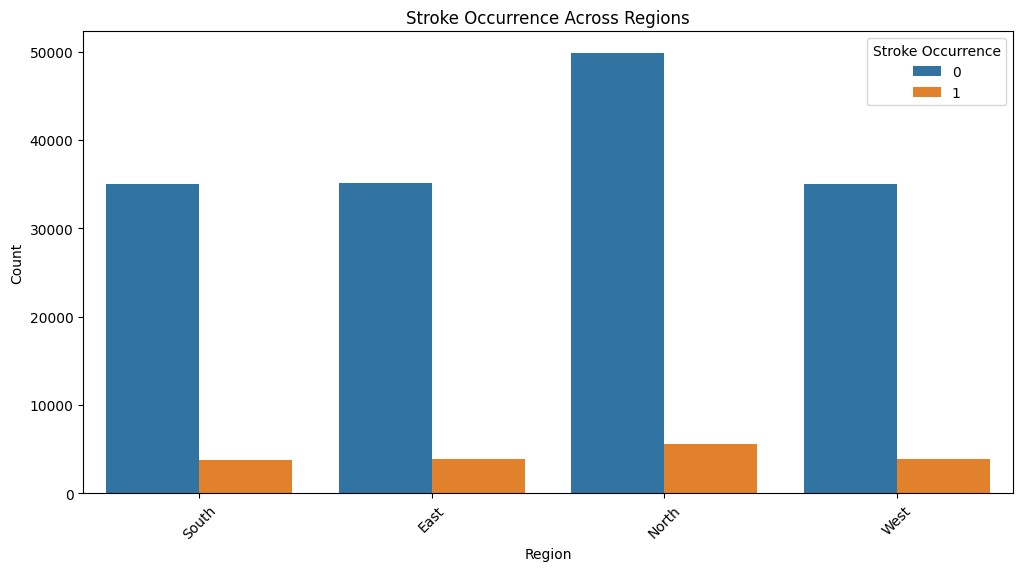

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Region', hue='Stroke Occurrence', palette='tab10')
plt.title('Stroke Occurrence Across Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Stroke Occurrence')
plt.xticks(rotation=45)
plt.show()

6. Stroke Occurrence Bar Chart

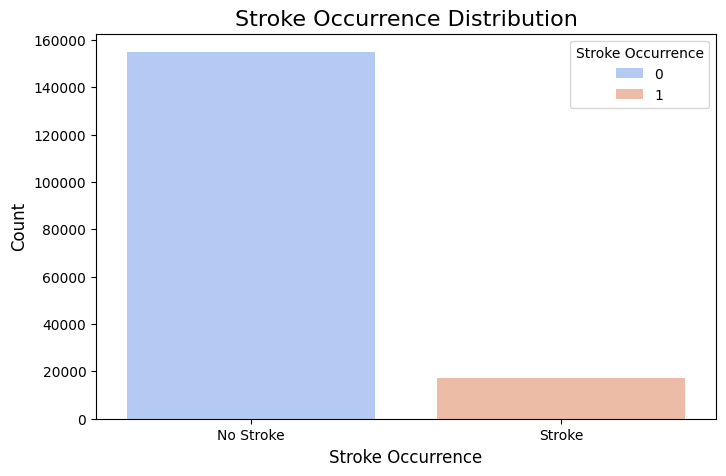

In [14]:
stroke_counts = df['Stroke Occurrence'].value_counts()
stroke_data = stroke_counts.reset_index()
stroke_data.columns = ['Stroke Occurrence', 'Count']

plt.figure(figsize=(8, 5))
sns.barplot(data=stroke_data, x=stroke_counts.index, y=stroke_counts.values, palette='coolwarm', hue='Stroke Occurrence', dodge=False)

plt.title('Stroke Occurrence Distribution', fontsize=16)
plt.xlabel('Stroke Occurrence', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No Stroke', 'Stroke'])
plt.show()

In [15]:
!pip install imbalanced-learn

In [16]:
from imblearn.under_sampling import RandomUnderSampler
x = df.drop(columns=['Stroke Occurrence'])
y = df['Stroke Occurrence']

rus = RandomUnderSampler(random_state=42)

x_resampled, y_resampled = rus.fit_resample(x, y)

undersampled_df = pd.concat([x_resampled, y_resampled], axis=1)

print(undersampled_df['Stroke Occurrence'].value_counts())


Stroke Occurrence
0    17096
1    17096
Name: count, dtype: int64


Stroke Occurrence Bar Chart after under sampling

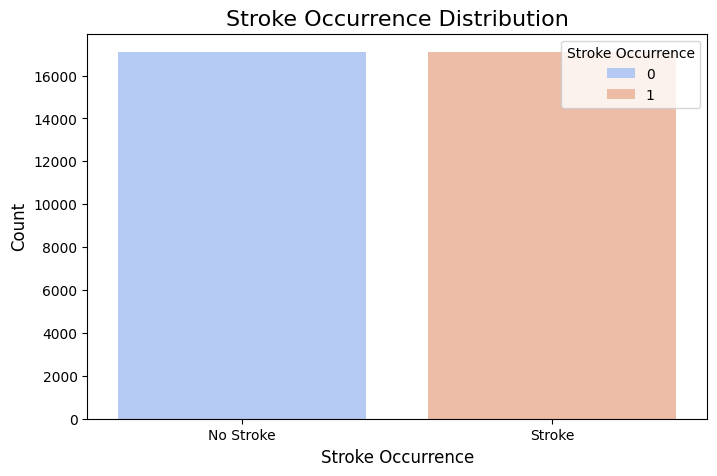

In [17]:
stroke_counts = undersampled_df['Stroke Occurrence'].value_counts()
stroke_data = stroke_counts.reset_index()
stroke_data.columns = ['Stroke Occurrence', 'Count']

plt.figure(figsize=(8, 5))
sns.barplot(data=stroke_data, x=stroke_counts.index, y=stroke_counts.values, palette='coolwarm', hue='Stroke Occurrence', dodge=False)

plt.title('Stroke Occurrence Distribution', fontsize=16)
plt.xlabel('Stroke Occurrence', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No Stroke', 'Stroke'])
plt.show()

In [18]:
undersampled_df.head()

,ID,Age,Gender,Hypertension,Heart Disease,Ever Married,Work Type,Residence Type,Average Glucose Level,BMI,...,Dietary Habits,Alcohol Consumption,Chronic Stress,Sleep Hours,Family History of Stroke,Education Level,Income Level,Stroke Risk Score,Region,Stroke Occurrence
116474,116475,67.0,Male,0.149724,0.000000,0.000000,Private,Rural,184.902157,10.4,...,Non-Vegetarian,1.000000,0.000000,4,0.148668,Tertiary,Middle,67.0,North,0
96241,96242,31.0,Other,0.000000,0.100193,0.301022,Private,Urban,165.900000,17.4,...,Vegetarian,0.000000,0.250045,11,1.000000,Primary,High,33.0,West,0
158612,158613,36.0,Female,0.000000,0.000000,0.000000,Private,Urban,184.902157,37.5,...,Vegetarian,0.199929,0.000000,7,1.000000,No education,Low,11.0,South,0
151943,151944,28.0,Male,0.000000,0.000000,1.000000,Government,Urban,112.090000,11.9,...,Mixed,0.000000,0.000000,10,0.000000,Primary,Low,43.0,North,0
67859,67860,57.0,Male,0.000000,1.000000,0.000000,Self-employed,Urban,259.390000,37.9,...,Non-Vegetarian,0.000000,0.000000,5,0.000000,No education,Low,16.0,North,0


In [19]:
undersampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34192 entries, 116474 to 171998
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        34192 non-null  int64  
 1   Age                       34192 non-null  float64
 2   Gender                    34192 non-null  object 
 3   Hypertension              34192 non-null  float64
 4   Heart Disease             34192 non-null  float64
 5   Ever Married              34192 non-null  float64
 6   Work Type                 34192 non-null  object 
 7   Residence Type            34192 non-null  object 
 8   Average Glucose Level     34192 non-null  float64
 9   BMI                       34192 non-null  float64
 10  Smoking Status            34192 non-null  object 
 11  Physical Activity         34192 non-null  object 
 12  Dietary Habits            34192 non-null  object 
 13  Alcohol Consumption       34192 non-null  float64
 14  Chron

In [20]:
new_df = undersampled_df.drop(columns=['ID'])
new_df.head()

,Age,Gender,Hypertension,Heart Disease,Ever Married,Work Type,Residence Type,Average Glucose Level,BMI,Smoking Status,...,Dietary Habits,Alcohol Consumption,Chronic Stress,Sleep Hours,Family History of Stroke,Education Level,Income Level,Stroke Risk Score,Region,Stroke Occurrence
116474,67.0,Male,0.149724,0.000000,0.000000,Private,Rural,184.902157,10.4,Never smoked,...,Non-Vegetarian,1.000000,0.000000,4,0.148668,Tertiary,Middle,67.0,North,0
96241,31.0,Other,0.000000,0.100193,0.301022,Private,Urban,165.900000,17.4,Formerly smoked,...,Vegetarian,0.000000,0.250045,11,1.000000,Primary,High,33.0,West,0
158612,36.0,Female,0.000000,0.000000,0.000000,Private,Urban,184.902157,37.5,Smokes,...,Vegetarian,0.199929,0.000000,7,1.000000,No education,Low,11.0,South,0
151943,28.0,Male,0.000000,0.000000,1.000000,Government,Urban,112.090000,11.9,Unknown,...,Mixed,0.000000,0.000000,10,0.000000,Primary,Low,43.0,North,0
67859,57.0,Male,0.000000,1.000000,0.000000,Self-employed,Urban,259.390000,37.9,Formerly smoked,...,Non-Vegetarian,0.000000,0.000000,5,0.000000,No education,Low,16.0,North,0


In [21]:
!pip install category_encoders

In [22]:
import category_encoders as ce

object_columns = new_df.select_dtypes(include=['object']).columns
encoder = ce.OrdinalEncoder(cols=object_columns)
new_df[object_columns] = encoder.fit_transform(new_df[object_columns])

In [23]:
new_df.head()

,Age,Gender,Hypertension,Heart Disease,Ever Married,Work Type,Residence Type,Average Glucose Level,BMI,Smoking Status,...,Dietary Habits,Alcohol Consumption,Chronic Stress,Sleep Hours,Family History of Stroke,Education Level,Income Level,Stroke Risk Score,Region,Stroke Occurrence
116474,67.0,1,0.149724,0.000000,0.000000,1,1,184.902157,10.4,1,...,1,1.000000,0.000000,4,0.148668,1,1,67.0,1,0
96241,31.0,2,0.000000,0.100193,0.301022,1,2,165.900000,17.4,2,...,2,0.000000,0.250045,11,1.000000,2,2,33.0,2,0
158612,36.0,3,0.000000,0.000000,0.000000,1,2,184.902157,37.5,3,...,2,0.199929,0.000000,7,1.000000,3,3,11.0,3,0
151943,28.0,1,0.000000,0.000000,1.000000,2,2,112.090000,11.9,4,...,3,0.000000,0.000000,10,0.000000,2,3,43.0,1,0
67859,57.0,1,0.000000,1.000000,0.000000,3,2,259.390000,37.9,2,...,1,0.000000,0.000000,5,0.000000,3,3,16.0,1,0


In [24]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34192 entries, 116474 to 171998
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       34192 non-null  float64
 1   Gender                    34192 non-null  int64  
 2   Hypertension              34192 non-null  float64
 3   Heart Disease             34192 non-null  float64
 4   Ever Married              34192 non-null  float64
 5   Work Type                 34192 non-null  int64  
 6   Residence Type            34192 non-null  int64  
 7   Average Glucose Level     34192 non-null  float64
 8   BMI                       34192 non-null  float64
 9   Smoking Status            34192 non-null  int64  
 10  Physical Activity         34192 non-null  int64  
 11  Dietary Habits            34192 non-null  int64  
 12  Alcohol Consumption       34192 non-null  float64
 13  Chronic Stress            34192 non-null  float64
 14  Sleep

In [25]:
x = new_df.drop(columns=['Stroke Occurrence'])
y = new_df['Stroke Occurrence']

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

lr = LogisticRegression()
dtree = DecisionTreeClassifier()
rfc = RandomForestClassifier(n_estimators=200)
nb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=6)

In [28]:
from sklearn.metrics import accuracy_score

ml_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'KNN']
ml_models = [lr, dtree, rfc, nb, knn]

for i,j in zip(ml_names, ml_models):

  j.fit(x_train, y_train)

  y_pred = j.predict(x_test)

  print(f'{i} : {accuracy_score(y_test, y_pred)*100:.2f}%')

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression : 50.37%
Decision Tree : 50.55%
Random Forest : 49.93%
Naive Bayes : 49.52%
KNN : 50.56%


In [29]:
from sklearn.metrics import confusion_matrix, classification_report
for i,j in zip(ml_names, ml_models):
  y_pred = j.predict(x_test)
  cm = confusion_matrix(y_test, y_pred)
  print(f'Confusion Matrix for {i}:\n{cm}')

  cr = classification_report(y_test, y_pred)
  print(f'Classification Report for {i}:\n{cr}')

Confusion Matrix for Logistic Regression:
[[1586 1861]
 [1533 1859]]
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.51      0.46      0.48      3447
           1       0.50      0.55      0.52      3392

    accuracy                           0.50      6839
   macro avg       0.50      0.50      0.50      6839
weighted avg       0.50      0.50      0.50      6839

Confusion Matrix for Decision Tree:
[[1732 1715]
 [1667 1725]]
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.51      0.50      0.51      3447
           1       0.50      0.51      0.50      3392

    accuracy                           0.51      6839
   macro avg       0.51      0.51      0.51      6839
weighted avg       0.51      0.51      0.51      6839

Confusion Matrix for Random Forest:
[[1781 1666]
 [1758 1634]]
Classification Report for Random Forest:
              precisio

In [30]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

ada_model = AdaBoostClassifier(n_estimators=200, random_state = 42)
gr_model = GradientBoostingClassifier(n_estimators = 200, random_state = 42)

ada_model.fit(x_train, y_train)
gr_model.fit(x_train, y_train)

y_pred_ada = ada_model.predict(x_test)
u_pred_gr = gr_model.predict(x_test)

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ada_score = accuracy_score(y_test, y_pred_ada)
gr_score = accuracy_score(y_test, u_pred_gr)
print(f'AdaBoost Accuracy: {ada_score*100:.2f}%')
print(f'Gradient Boosting Accuracy: {gr_score*100:.2f}%')


AdaBoost Accuracy: 49.35%
Gradient Boosting Accuracy: 49.82%


In [32]:
from imblearn.over_sampling import RandomOverSampler

x = df.drop(columns=['Stroke Occurrence'])
y = df['Stroke Occurrence']

ros = RandomOverSampler(random_state=42)

x_resampled, y_resampled = ros.fit_resample(x, y)

oversampled_df = pd.concat([x_resampled, y_resampled], axis=1)

print(oversampled_df['Stroke Occurrence'].value_counts())


Stroke Occurrence
0    154904
1    154904
Name: count, dtype: int64


In [33]:
oversampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309808 entries, 0 to 309807
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        309808 non-null  int64  
 1   Age                       309808 non-null  float64
 2   Gender                    309808 non-null  object 
 3   Hypertension              309808 non-null  float64
 4   Heart Disease             309808 non-null  float64
 5   Ever Married              309808 non-null  float64
 6   Work Type                 309808 non-null  object 
 7   Residence Type            309808 non-null  object 
 8   Average Glucose Level     309808 non-null  float64
 9   BMI                       309808 non-null  float64
 10  Smoking Status            309808 non-null  object 
 11  Physical Activity         309808 non-null  object 
 12  Dietary Habits            309808 non-null  object 
 13  Alcohol Consumption       309808 non-null  f

In [34]:
new_df = oversampled_df.drop(columns=['ID'])
new_df.head()

,Age,Gender,Hypertension,Heart Disease,Ever Married,Work Type,Residence Type,Average Glucose Level,BMI,Smoking Status,...,Dietary Habits,Alcohol Consumption,Chronic Stress,Sleep Hours,Family History of Stroke,Education Level,Income Level,Stroke Risk Score,Region,Stroke Occurrence
0,78.0,Female,0.0,0.0,0.301022,Private,Rural,267.300000,36.2,Formerly smoked,...,Non-Vegetarian,0.0,0.000000,11,0.0,Tertiary,Low,88.000000,South,0
1,60.0,Female,0.0,0.0,0.000000,Private,Rural,207.240000,19.8,Never smoked,...,Vegetarian,0.0,0.000000,9,0.0,Secondary,High,56.000000,East,0
2,69.0,Male,0.0,0.0,0.000000,Private,Urban,161.300000,34.5,Never smoked,...,Mixed,1.0,0.000000,3,0.0,Secondary,High,50.604806,North,1
3,43.0,Male,0.0,0.0,1.000000,Never Worked,Urban,247.490000,48.8,Never smoked,...,Non-Vegetarian,0.0,0.250045,4,0.0,Tertiary,Low,93.000000,South,0
4,30.0,Female,0.0,0.0,1.000000,Government,Urban,184.902157,31.3,Formerly smoked,...,Mixed,0.0,1.000000,9,0.0,Secondary,Low,99.000000,West,0


In [35]:
object_columns = new_df.select_dtypes(include=['object']).columns
encoder = ce.OrdinalEncoder(cols=object_columns)
new_df[object_columns] = encoder.fit_transform(new_df[object_columns])

In [36]:
new_df.head()

,Age,Gender,Hypertension,Heart Disease,Ever Married,Work Type,Residence Type,Average Glucose Level,BMI,Smoking Status,...,Dietary Habits,Alcohol Consumption,Chronic Stress,Sleep Hours,Family History of Stroke,Education Level,Income Level,Stroke Risk Score,Region,Stroke Occurrence
0,78.0,1,0.0,0.0,0.301022,1,1,267.300000,36.2,1,...,1,0.0,0.000000,11,0.0,1,1,88.000000,1,0
1,60.0,1,0.0,0.0,0.000000,1,1,207.240000,19.8,2,...,2,0.0,0.000000,9,0.0,2,2,56.000000,2,0
2,69.0,2,0.0,0.0,0.000000,1,2,161.300000,34.5,2,...,3,1.0,0.000000,3,0.0,2,2,50.604806,3,1
3,43.0,2,0.0,0.0,1.000000,2,2,247.490000,48.8,2,...,1,0.0,0.250045,4,0.0,1,1,93.000000,1,0
4,30.0,1,0.0,0.0,1.000000,3,2,184.902157,31.3,1,...,3,0.0,1.000000,9,0.0,2,1,99.000000,4,0


In [37]:
x = new_df.drop(columns=['Stroke Occurrence'])
y = new_df['Stroke Occurrence']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [39]:
ml_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'KNN']
ml_models = [lr, dtree, rfc, nb, knn]

for i,j in zip(ml_names, ml_models):

  j.fit(x_train, y_train)

  y_pred = j.predict(x_test)

  print(f'{i} : {accuracy_score(y_test, y_pred)*100:.2f}%')

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression : 50.49%
Decision Tree : 93.79%
Random Forest : 99.97%
Naive Bayes : 50.92%
KNN : 82.56%


In [40]:
from sklearn.metrics import confusion_matrix, classification_report
for i,j in zip(ml_names, ml_models):
  y_pred = j.predict(x_test)
  cm = confusion_matrix(y_test, y_pred)
  print(f'Confusion Matrix for {i}:\n{cm}')

  cr = classification_report(y_test, y_pred)
  print(f'Classification Report for {i}:\n{cr}')

Confusion Matrix for Logistic Regression:
[[15821 15128]
 [15550 15463]]
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.50      0.51      0.51     30949
           1       0.51      0.50      0.50     31013

    accuracy                           0.50     61962
   macro avg       0.50      0.50      0.50     61962
weighted avg       0.50      0.50      0.50     61962

Confusion Matrix for Decision Tree:
[[27121  3828]
 [   21 30992]]
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93     30949
           1       0.89      1.00      0.94     31013

    accuracy                           0.94     61962
   macro avg       0.94      0.94      0.94     61962
weighted avg       0.94      0.94      0.94     61962

Confusion Matrix for Random Forest:
[[30949     0]
 [   21 30992]]
Classification Report for Random Forest:
          

#Using GridSearchCV in Decision Tree

In [41]:
from sklearn.model_selection import GridSearchCV

parameter_dt = {'criterion': ['gini', 'entropy'],
             'max_depth': list(range(5,30,5)),
             'min_samples_leaf': list(range(10,100,10))}

grid_dt = GridSearchCV(estimator = dtree, param_grid = parameter_dt, scoring = 'accuracy', cv = 5)
grid_dt.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 25],
                         'min_samples_leaf': [10, 20, 30, 40, 50, 60, 70, 80,
                                              90]},
             scoring='accuracy')

In [42]:
grid_dt.best_params_

{'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 10}

#Using GridSearchCV in Random Forest Classifier

In [43]:
parameter_rf = {
  'n_estimators': list(range(100,200,100)),
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(5,15,5))
}

grid_rf = GridSearchCV(estimator = rfc, param_grid = parameter_rf, scoring = 'accuracy', cv = 5)
grid_rf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=200),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 10],
                         'n_estimators': [100]},
             scoring='accuracy')

In [44]:
grid_rf.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}

In [45]:
parameter_knn = {'n_neighbors': list(range(5,15,5)),
             'weights': ['uniform', 'distance'],
             'leaf_size': list(range(10,30,10))}

grid_knn = GridSearchCV(estimator = knn, param_grid = parameter_knn, scoring = 'accuracy', cv =5)
grid_knn.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=6),
             param_grid={'leaf_size': [10, 20], 'n_neighbors': [5, 10],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [46]:
grid_knn.best_params_

{'leaf_size': 10, 'n_neighbors': 5, 'weights': 'distance'}